In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.optimizers import Adam
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.layers.convolutional import *
#from keras.layers.normalization import Batchnormalization
from keras import backend as K 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
%matplotlib inline
import matplotlib.pyplot as plt
import itertools


In [3]:
#train_path='D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/new_dataset/train'
#valid_path='D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/new_dataset/valid'
#test_path='D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/new_dataset/test'
train_path='D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gender_dataset_face/train'
valid_path='D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gender_dataset_face/validate'
test_path='D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gender_dataset_face/test'

In [4]:
train_batches=ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['man','woman'], batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['man','woman'], batch_size=10)
test_batches=ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['man','woman'], batch_size=10)


Found 2237 images belonging to 2 classes.
Found 2237 images belonging to 2 classes.
Found 2237 images belonging to 2 classes.


In [5]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
imgs,labels=next(train_batches)

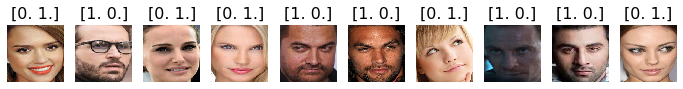

In [8]:
plots(imgs, titles=labels)
#classroom=10   encoding  woman 01
#nonclassroom=01          man 10

In [9]:
#Build and train cnn

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',input_shape=(224,224,3)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='catrgorical_crossentropy',
 #             optimizer='adam',
  #            metrics=['accuracy'])
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
#fashion_model.summary()

In [12]:
#model.fit_generator(train_batches, steps_per_epoch=6, validation_data = valid_batches, epochs=4, validation_steps=6, verbose=2)
model.fit_generator(train_batches, steps_per_epoch=20, epochs=6, verbose=2, validation_data=valid_batches, validation_steps=20)

#model.fit_generator(train_batches, steps_per_epoch = 25,epochs = epochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
224/224 [==============================] - 59s 265ms/step - loss: 8.2040 - acc: 0.4913
 - 231s - loss: 8.2014 - acc: 0.4908 - val_loss: 8.2040 - val_acc: 0.4913
Epoch 2/6
224/224 [==============================] - 53s 237ms/step - loss: 8.1917 - acc: 0.4913
 - 215s - loss: 8.1978 - acc: 0.4913 - val_loss: 8.1917 - val_acc: 0.4913
Epoch 3/6
224/224 [==============================] - 87s 389ms/step - loss: 8.1978 - acc: 0.4913
 - 254s - loss: 8.2009 - acc: 0.4913 - val_loss: 8.1978 - val_acc: 0.4913
Epoch 4/6
224/224 [==============================] - 67s 297ms/step - loss: 8.2009 - acc: 0.4913
 - 267s - loss: 8.2009 - acc: 0.4913 - val_loss: 8.2009 - val_acc: 0.4913
Epoch 5/6
224/224 [==============================] - 73s 326ms/step - loss: 8.2009 - acc: 0.4913
 - 264s - loss: 8.2009 - acc: 0.4913 - val_loss: 8.2009 - val_acc: 0.4913
Epoch 6/6
224/224 [==============================] - 66s 296ms/step - loss: 8.1947 - acc: 0.4913


In [13]:
#predict

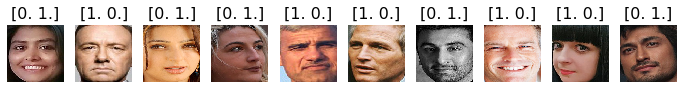

In [14]:
test_imgs,test_labels =next(test_batches)
plots(test_imgs, titles=labels)

In [15]:
test_labels = test_labels[1]
test_labels

array([1., 0.], dtype=float32)

In [16]:
predictions =model.predict_generator(test_batches, steps=1,verbose=0)

In [17]:
#predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [19]:
from sklearn.metrics import confusion_matrix


In [20]:
cm=confusion_matrix(test_labels, predictions[1])

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 1]
 [1 0]]


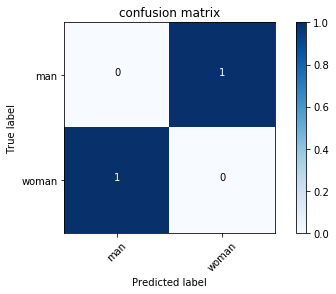

In [22]:
cm_plot_labels=['man','woman']
plot_confusion_matrix(cm, cm_plot_labels, title='confusion matrix')

In [22]:
#Save the model
#model.save_weights('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/new_dataset/model_wieghts.h5')
#model.save('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/new_dataset/model_keras.h5')

In [ ]:
#different than this
#to check the code
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
#Different plot functions
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()